### 1. Import packages

In [6]:
import numpy as np
import matplotlib
import pandas as pd
from matplotlib import transforms, pyplot as plt
from pandas.plotting import parallel_coordinates

%matplotlib inline

### 2. Define colours

In [2]:
GRAY1, GRAY2, GRAY3 = '#231F20', '#414040', '#555655'
GRAY4, GRAY5, GRAY6 = '#646369', '#76787B', '#828282'
GRAY7, GRAY8, GRAY9 = '#929497', '#A6A6A5', '#BFBEBE'
BLUE1, BLUE2, BLUE3, BLUE4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
RED1, RED2 = '#C3514E', '#E6BAB7'
GREEN1, GREEN2 = '#0C8040', '#9ABB59'
ORANGE1 = '#F79747'

### 3. Define function for multi-colour text generation

In [3]:
# matplotlib doesn't have a function for drawing text with
# different colors, let's implement it
def rainbow_text(x, y, text, colors, spacing=20, ax=None, **kw):
    colors = list(reversed(colors))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, line in enumerate(reversed(text.split('\n'))):
        strings = line.split('||')
        for s, c in zip(strings, colors[i]):
            text = ax.text(x, y, s, color=c, transform=t, **kw)
            text.draw(canvas.get_renderer())
            ex = text.get_window_extent()
            t = transforms.offset_copy(text._transform, x=ex.width, 
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * spacing, 
                                   units='dots')

### 4. Configure plot

In [4]:
# configure plot font family to Arial
plt.rcParams['font.family'] = 'Arial'
# configure mathtext bold and italic font family to Arial
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'

### 5. Define data

In [5]:
education = ["Bachelor's degree or more", 'Some college', 'High school grad', 'Less than high school']
year_2008 = [62,43,36,27]
year_2009 = [61,42,35,26] #estimated
year_2010 = [59,38,30,23] #estimated
year_2011 = [56,37.5,30.5,22.5] #estimated
year_2012 = [57,37,30,23]

In [79]:
df = pd.DataFrame(list(map(list, zip(*[education,year_2008,year_2009,year_2010,year_2011,year_2012]))))
df = df.rename(columns = {0:'education',1:'2008',2:'2009',3:'2010',4:'2011',5:'2012'})
df

,education,2008,2009,2010,2011,2012
0,Bachelor's degree or more,62,61,59,56.0,57
1,Some college,43,42,38,37.5,37
2,High school grad,36,35,30,30.5,30
3,Less than high school,27,26,23,22.5,23


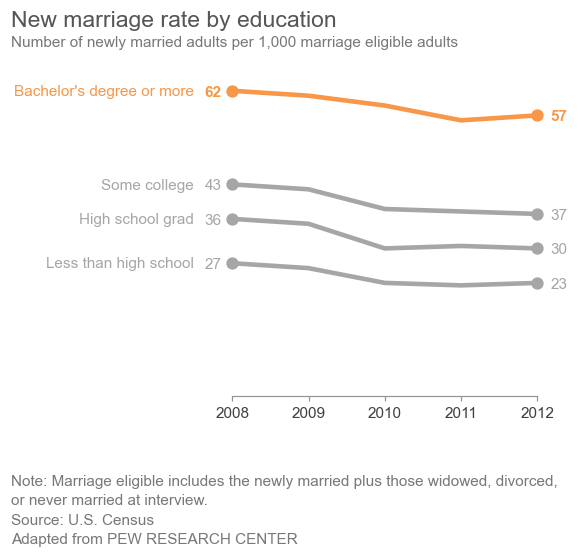

In [207]:
#Create figure and plot axes
fig, ax1 = plt.subplots(figsize=(7.6, 5.5),  # width, height in inches
                        dpi=110)             # resolution of the figure

#Tune the subplot layout by setting sides of the figure
plt.subplots_adjust(left=0.065, right=0.43, top=0.76, bottom=0.19)

#Create a twin Axes sharing the xaxis with the same limits for y-axis
ax2 = ax1.twinx()

#Set yaxes limits
ax2.set_ylim([0, 70])
ax1.set_ylim([0, 70])

#Assign colors for responses
C = [ORANGE1,GRAY8, GRAY8, GRAY8]

#Create plot 
#1. parallel coordinate plot
parallel_coordinates(df, 'education',axvlines=False,color=C,linewidth=3)
#2. Scatterplot for points
for i in range(len(year_2008)):
    #Draw circles
    ax1.scatter([0, 4], [year_2008[i], year_2012[i]], color=C[i], s=50, clip_on=False)
    
    # add label
    plt.text(-0.5,
             year_2008[i] -1,
             education[i],
             fontsize=10,
             linespacing=1.5,
             horizontalalignment='right',
             color=C[i])

#For each of the axes
for ax in (ax1, ax2):
    
    #Remove borderlines
    for spine in ax.spines.values():
        spine.set_visible(False)
        
    #Remove gridlines
    ax.yaxis.grid(False)
    ax.xaxis.grid(False)
    
    #Remove tick line
    ax.tick_params(axis='y', which='both', length=0)

#Set properties for y-axes object
for ax, year in [(ax1,'2008'),(ax2,'2012')]:
    plt.setp(ax,
             yticks=df[year], 
             yticklabels=[str(v) for v in df[year]]) 

#Configure both y's tick labels appearance
for ax, xshift in ((ax1, -0.05), (ax2, 0.07)):
    for i, item in enumerate(ax.get_yticklabels()):
        item.set_fontsize(10)
        if i == 0: 
            item.set_fontweight('bold')
        item.set_color(C[i])
        # use trasformations to shift y tick labels
        # left y labels slightly right, and right labels slightly left
        offset = transforms.ScaledTranslation(xshift, 0, fig.dpi_scale_trans)
        item.set_transform(item.get_transform() + offset)

#Change x ticks color
ax1.tick_params(axis='x', colors=GRAY7)

#Add bottom spine with gray color and bounds between 0 and 1
ax1.spines['bottom'].set_visible(True)
ax1.spines['bottom'].set_bounds(0, 4)
ax1.spines['bottom'].set_color(GRAY7)
        
#Configure x tick label appearance
for item in ax1.get_xticklabels():
    item.set_fontsize(10)
    item.set_color(GRAY2)
               
#Remove legend
ax2.legend().set_visible(False)

#Add title
plt.text(-2.9, 75, 'New marriage rate by education', fontsize=15, 
         color=GRAY3)
plt.text(-2.9, 71, 'Number of newly married adults per 1,000 marriage eligible adults', fontsize=10, 
         color=GRAY5)

#Add subtitle
plt.text(-2.9, -30,
         """Note: Marriage eligible includes the newly married plus those widowed, divorced,\nor never married at interview.\nSource: U.S. Census\nAdapted from PEW RESEARCH CENTER""",
         fontsize=10,
         linespacing=1.5,
         color=GRAY5)

plt.show()